In [57]:
import numpy as np
import scipy as sp
from scipy import optimize, spatial
import matplotlib.pyplot as plt
import os
import urllib.request as req

!pip install frigidum
import frigidum
from frigidum.examples import tsp

**RNG**

In [ ]:
k_sz = 1001
eps = 1e-3
np.random.seed(359)

def prod_func(x):
    return 1 / (x ** 2 - 3 * x + 2)

delta = np.random.rand(k_sz)
x = np.linspace(0, 3, k_sz)
y = np.zeros(k_sz)

#noisy data generation
for i, xk in enumerate(x):
    fxk = prod_func(xk)
    if fxk < -100:
        y[i] = -100 + delta[i]
    elif -100 <= fxk <= 100:
        y[i] = fxk + delta[i]
    else:
        y[i] = 100 + delta[i]

In [ ]:
def rat_func(x, a, b, c, d):
    return (a * x + b) / (x ** 2 + c * x + d)

def obj_func(params, val, x):
    a, b, c, d = params
    return sum((val - rat_func(x, a, b, c, d))**2)

def obj_func_vect(params, val, x):
    a, b, c, d = params
    return (val - rat_func(x, a, b, c, d))

In [ ]:
args_var = (y, x)
start_1 = [1, 0, 1, 1]
start_2 = ((-1, 1), (-1, 1), (-1, 1), (-1, 1))

nelder_mead = optimize.minimize(obj_func, start_1, args = args_var, method='Nelder-Mead', tol=eps)
lma = optimize.least_squares(obj_func_vect, start_1, args = args_var, method='lm', ftol=eps)
annealing = optimize.dual_annealing(obj_func, start_2, args = args_var)
diff_evol = optimize.differential_evolution(obj_func, start_2, args = args_var, tol=eps)

**Nelder-Mead**

In [ ]:
print(f'solution = {nelder_mead.x}, iterations = {nelder_mead.nit}, f-calculations = {nelder_mead.nfev}')

solution = [-0.04045663  0.0385395  -2.01886901  1.01897744], iterations = 286, f-calculations = 501


**Levenberg-Markquardt**

In [ ]:
print(f'solution = {lma.x}, f-calculations = {lma.nfev}')

solution = [-1.00150508  1.00196434 -2.00076461  1.00078079], f-calculations = 73


**Annealing**

In [ ]:
print(f'solution = {annealing.x}, iterations = {annealing.nit}, f-calculations = {annealing.nfev}')

solution = [-0.48635632  0.07248451 -0.36799879 -0.63281183], iterations = 1000, f-calculations = 8881


**Differential evolution**

In [ ]:
print(f'solution = {diff_evol.x}, iterations = {diff_evol.nit}, f-calculations = {diff_evol.nfev}')

solution = [-1.          0.95026607 -1.          0.47238224], iterations = 8, f-calculations = 610


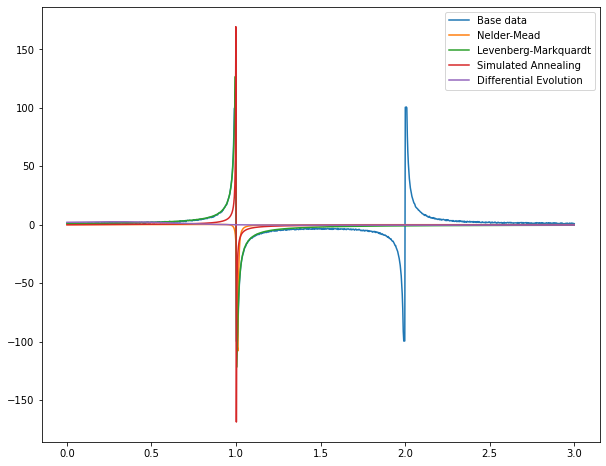

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(x, y)
plt.plot(x, rat_func(x, *nelder_mead.x))
plt.plot(x, rat_func(x, *lma.x))
plt.plot(x, rat_func(x, *annealing.x))
plt.plot(x, rat_func(x, *diff_evol.x))
plt.legend(['Base data', 'Nelder-Mead', 'Levenberg-Markquardt', 
            'Simulated Annealing', 'Differential Evolution'])

**Cities**

In [ ]:
cities_name = 'pcb442.tsp'
cities_link = 'http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/pcb442.tsp'

if not os.path.exists(cities_name):
    req.urlretrieve(cities_link, cities_name)

with open(cities_name) as input_file:
    data = input_file.readlines()[6:-1]
data = [line.strip() for line in data]
data = [[line.split(' ')[1].strip(), line.split(' ')[2].strip()] for line in data]
data = np.array(data, dtype=float)
dist_matrix = spatial.distance.squareform(spatial.distance.pdist(data))

**Random inital guess**

Text(0, 0.5, 'y')

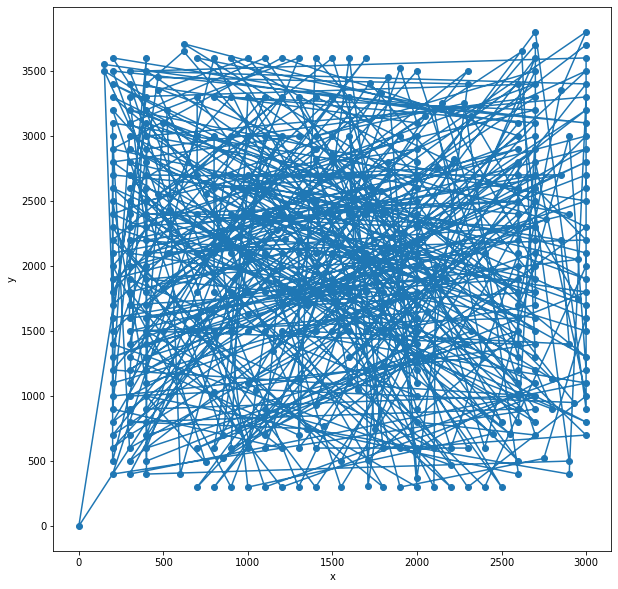

In [64]:
def rand_init():
    rand_guess = np.arange(0, data.shape[0])
    np.random.shuffle(rand_guess)
    return rand_guess

init_guess = rand_init()
plt.figure(figsize=(10, 10))
plt.scatter(data[:, 0][init_guess], data[:, 1][init_guess], )
plt.plot(data[:, 0][init_guess], data[:, 1][init_guess], )
plt.xlabel('x')
plt.ylabel('y')

**Optimization**

In [58]:
local_opt = frigidum.sa(random_start = init_guess,
           objective_function=tsp.objective_function,
           neighbours=[tsp.euclidian_bomb_and_fix, tsp.euclidian_nuke_and_fix, tsp.route_bomb_and_fix, tsp.route_nuke_and_fix, tsp.random_disconnect_vertices_and_fix],
           copy_state=frigidum.annealing.naked,
           T_start=10**5,
           alpha=.92,
           T_stop=0.001,
           repeats=10**2,
           post_annealing = tsp.local_search_2opt)

T: 0.001, M: 0.00, O_min: 53218.0191, O_current: 53218.0191: 100%|██████████| 221/221 [05:03<00:00,  1.37s/cooling]


---
Neighbour Statistics: 
(proportion of proposals which got accepted *and* changed the objective function)
   euclidian_bomb_and_fix           : 0.219028
   euclidian_nuke_and_fix           : 0.257763
   route_bomb_and_fix               : 0.261803
   route_nuke_and_fix               : 0.251400
   random_disconnect_vertices_and_  : 0.136004
---
(Local) Minimum Objective Value Found: 
   52855.59021887


In [62]:
print(f'solution: {local_opt[0]} \n min temperature: {local_opt[1]}')


solution: [109 121 131 390 143 144 156 167 180 193 204 216 205 206 194 195 217 207
 196 181 168 157 145 132 122 110 100 435 378  94  62  63  95 379  96  97
  64  32 376 375  31  30  29  28  27  60  61  93  92  91  59  26  25  24
  57  58  90  89  88  56  23  22  55  54  21  20  19  18  17  16  15  14
  47  48  49  50  51  83  84  52  53  85  86  87 377 381 380 108 387 389
 393 394 178 397 177 165 154 141 129 118 107 438  82  81  80  99  79  78
  77  45  46  13  12  11  44  43  10   9  42  74  75  76  98 105 104 116
 127 138 152 392 174 186 402 210 211 220 228 229 221 212 199 187 175 162
 139 106 117 128 140 153 164 163 396 176 188 200 213 401 201 189 190 202
 214 223 231 222 230 251 250 249 414 248 247 246 245 244 243 242 241 240
 266 270 273 276 269 239 234 406 227 405 400 185 398 395 173 172 161 149
 150 151 391 137 115 386 388 136 126 114 385 440 103 101  65  33  34  66
  67  68  35  36  37  69  70  71  40  72  73  41   8   7   6  39  38   5
   4   3   2   1   0 441 102 113 125 135 

Text(0, 0.5, 'y')

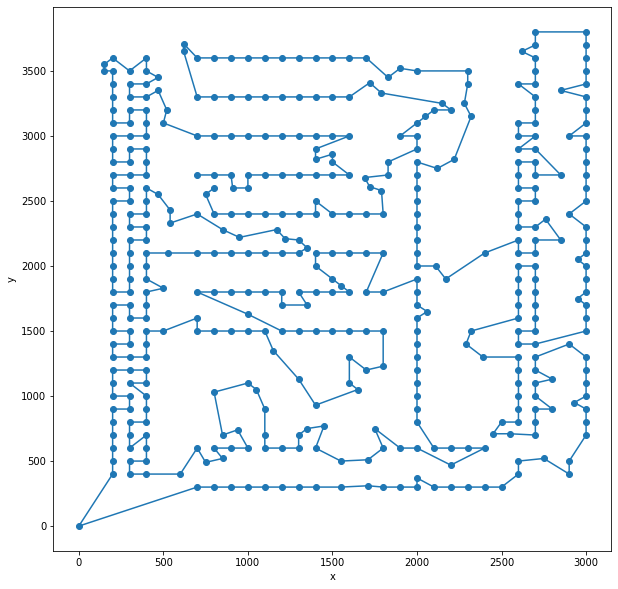

In [63]:
plt.figure(figsize=(10, 10))
plt.scatter(data[:, 0][local_opt[0]], data[:, 1][local_opt[0]])
plt.plot(data[:, 0][local_opt[0]], data[:, 1][local_opt[0]])
plt.xlabel('x')
plt.ylabel('y')